In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from keras import callbacks
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import time
from sklearn.preprocessing import MinMaxScaler
import math

In [ ]:
#for loading dataset from google drive 
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab_Notebooks/

%ls

/content/drive/My Drive/Colab_Notebooks
'Copy of TensorFlow-Introduction.ipynb'    hw32/
'Copy of YOLOv4_Training_Tutorial.ipynb'   KDDTest+.txt
 hw12.ipynb                                KDDTrain+.txt
 hw13.ipynb                                model1.h5
 hw14.ipynb                                UNSW_NB15_testing-set.csv
 hw15.ipynb                                UNSW_NB15_training-set.csv
 hw1.ipynb                                 Untitled0.ipynb
 hw2/                                      Untitled1.ipynb
 hw3/                                      Untitled2.ipynb


In [ ]:
xxxx = pd.read_csv('UNSW_NB15_training-set.csv')

In [ ]:
# feature_list = ["F"+str(i) for i in range(1,45)]
# nsl_kdd = pd.read_csv ('KDDTrain+.txt' , names =feature_list )
# nsl_kdd_test = pd.read_csv('KDDTest+.txt',names =feature_list )
df_UNSW = pd.read_csv('UNSW_NB15_training-set.csv')
df_UNSW_test = pd.read_csv('UNSW_NB15_testing-set.csv')
df_UNSW

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
print("len of attack types for train data set is "+str(len(df_UNSW.value_counts('attack_cat'))))
print(df_UNSW.value_counts('attack_cat'))
print("___________________________________________________")
print("len of attack types for test data set is "+str(len(df_UNSW_test.value_counts('attack_cat'))))
df_UNSW_test.value_counts('attack_cat')

len of attack types for train data set is 10
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
dtype: int64
___________________________________________________
len of attack types for test data set is 10


attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
dtype: int64

In [ ]:
# df_UNSW_test = df_UNSW_test.loc[:, df_UNSW_test.columns !=  'attack_cat' ]
# df_UNSW = df_UNSW.loc[:, df_UNSW.columns !=  'attack_cat' ]

# df_UNSW

In [ ]:
# df_UNSW_test

In [ ]:
print(df_UNSW.shape)
df_UNSW.info()

(82333, 43)
<class 'pandas.core.frame.DataFrame'>
Index: 82333 entries, id to 82332
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   F1      82333 non-null  object
 1   F2      82333 non-null  object
 2   F3      82333 non-null  object
 3   F4      82333 non-null  object
 4   F5      82333 non-null  object
 5   F6      82333 non-null  object
 6   F7      82333 non-null  object
 7   F8      82333 non-null  object
 8   F9      82333 non-null  object
 9   F10     82333 non-null  object
 10  F11     82333 non-null  object
 11  F12     82333 non-null  object
 12  F13     82333 non-null  object
 13  F14     82333 non-null  object
 14  F15     82333 non-null  object
 15  F16     82333 non-null  object
 16  F17     82333 non-null  object
 17  F18     82333 non-null  object
 18  F19     82333 non-null  object
 19  F20     82333 non-null  object
 20  F21     82333 non-null  object
 21  F22     82333 non-null  object
 22  F23     82333 

In [ ]:
# print(nsl_kdd_test.shape)
# nsl_kdd_test.info()

In [ ]:
cat_columns = df_UNSW.select_dtypes(['object']).columns
cat_columns

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

In [ ]:
#categorical to numeric
for col_name in cat_columns :
      df_UNSW[col_name]= df_UNSW[col_name].astype('category')
      df_UNSW[col_name] = df_UNSW[col_name].cat.codes
      #_______
      #df_UNSW_test
      df_UNSW_test[col_name]= df_UNSW_test[col_name].astype('category')
      df_UNSW_test[col_name] = df_UNSW_test[col_name].cat.codes

df_UNSW_test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,119,2,3,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,5,1
175337,175338,0.505762,113,0,2,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,8,1
175338,175339,0.000009,119,2,3,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,5,1
175339,175340,0.000009,119,2,3,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,5,1


In [ ]:
df_UNSW_y = df_UNSW['attack_cat']
df_UNSW_x = df_UNSW.loc[:, df_UNSW.columns !=  'attack_cat' ]

df_UNSW_y_test = df_UNSW_test['attack_cat']
df_UNSW_x_test = df_UNSW_test.loc[:, df_UNSW_test.columns !=  'attack_cat' ]


In [ ]:
set(df_UNSW_y.values)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
# nsl_kdd_y_test.value_counts()

In [ ]:
#Normalization
all_cols = df_UNSW_x.columns
scaler = MinMaxScaler(feature_range=(0, 1))
df_UNSW_x[all_cols] =  MinMaxScaler().fit_transform(df_UNSW_x[all_cols])

#____test____
all_cols = df_UNSW_x_test.columns
scaler = MinMaxScaler(feature_range=(0, 1))
df_UNSW_x_test[all_cols] =  scaler.fit_transform(df_UNSW_x_test[all_cols])
df_UNSW_x_test

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000000,2.024634e-03,0.856061,0.000000,0.250,0.000520,0.000364,0.000018,0.000012,0.000074,...,0.00,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0
1,0.000006,1.083170e-02,0.856061,0.000000,0.250,0.001352,0.003463,0.000054,0.002867,0.000078,...,0.00,0.000000,0.015625,0.00,0.00,0.0,0.000000,0.081967,0.0,0.0
2,0.000011,2.705215e-02,0.856061,0.000000,0.250,0.000728,0.001458,0.000026,0.000900,0.000014,...,0.00,0.000000,0.031250,0.00,0.00,0.0,0.016949,0.081967,0.0,0.0
3,0.000017,2.802737e-02,0.856061,0.250000,0.250,0.001144,0.001093,0.000046,0.000053,0.000014,...,0.00,0.000000,0.031250,0.25,0.25,0.0,0.016949,0.000000,0.0,0.0
4,0.000023,7.490901e-03,0.856061,0.000000,0.250,0.000936,0.000547,0.000039,0.000018,0.000033,...,0.02,0.000000,0.609375,0.00,0.00,0.0,0.016949,0.622951,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.999977,1.500000e-07,0.901515,0.166667,0.375,0.000104,0.000000,0.000007,0.000000,0.111111,...,0.46,0.266667,0.359375,0.00,0.00,0.0,0.389831,0.377049,0.0,1.0
175337,0.999983,8.429368e-03,0.856061,0.000000,0.250,0.000936,0.000729,0.000046,0.000024,0.000034,...,0.00,0.000000,0.015625,0.00,0.00,0.0,0.000000,0.000000,0.0,1.0
175338,0.999989,1.500000e-07,0.901515,0.166667,0.375,0.000104,0.000000,0.000007,0.000000,0.111111,...,0.04,0.044444,0.187500,0.00,0.00,0.0,0.033898,0.180328,0.0,1.0
175339,0.999994,1.500000e-07,0.901515,0.166667,0.375,0.000104,0.000000,0.000007,0.000000,0.111111,...,0.58,0.288889,0.453125,0.00,0.00,0.0,0.491525,0.475410,0.0,1.0


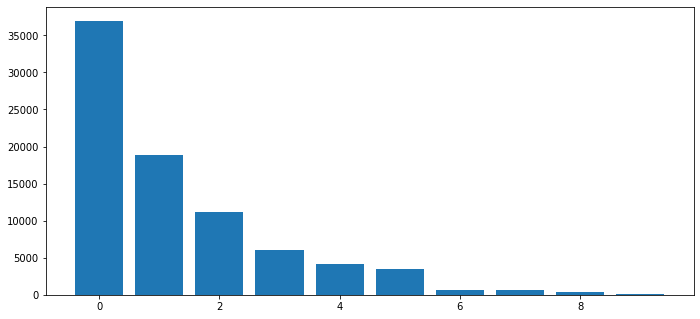

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figwidth(9)
ax = fig.add_axes([0,0,1,1])

freq = df_UNSW_y.value_counts()
ax.bar(range(len(freq)),freq)
plt.show()

In [ ]:
def creat_bias_list(y):
  
  freq_dic = y.value_counts().to_dict()
  # print(freq_dic)

  bias_item = {}
  for item in freq_dic :
    bias_item[item ] = math.log(freq_dic[item]/sum(df_UNSW_y.value_counts()))
  bias_item_list = []
  for item in bias_item :
    bias_item_list.append(bias_item[item])
  return bias_item_list

def bias_init(bias_item_list):
    return keras.backend.variable(bias_item_list)


def make_model(activation , optimizer , n_of_input, n_of_output,bias_item_list) :

  model = Sequential();
  model.add(tf.keras.Input(shape=(n_of_input,)))#41
  model.add(tf.keras.layers.Dropout(0.2, input_shape=(41,)))#
  model.add(tf.keras.layers.Dense(units = 128 , activation = activation , kernel_initializer='he_normal' ))
  model.add(BatchNormalization())
  model.add(tf.keras.layers.Dense(units = 64 , activation = activation ))
  model.add(tf.keras.layers.Dense(units = 32 , activation = activation ))
  model.add(tf.keras.layers.Dense(units = n_of_output , activation = 'softmax'  ,  bias_initializer= tf.keras.initializers.Constant(bias_item_list)) )#5
  
  if optimizer == 'adam' :
    opt = tf.keras.optimizers.Adam(learning_rate=0.1)
  else :
    opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)

  model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),  metrics=['accuracy'] ,  optimizer=opt  )
  return model

def make_model_4(activation , optimizer , n_of_input, n_of_output,bias_item_list) :

  model = Sequential();
  model.add(tf.keras.Input(shape=(n_of_input,)))#41
  model.add(tf.keras.layers.Dense(units = 256 , activation = activation , kernel_initializer='he_normal' ))
  model.add(BatchNormalization())
  model.add(tf.keras.layers.Dense(units = 128 , activation = activation ))
  model.add(tf.keras.layers.Dropout(0.2, input_shape=(41,)))#
  model.add(tf.keras.layers.Dense(units = 64 , activation = activation ))
  model.add(BatchNormalization())
  model.add(tf.keras.layers.Dense(units = 32 , activation = activation ))
  model.add(tf.keras.layers.Dense(units = n_of_output , activation = 'softmax'  ,  bias_initializer= tf.keras.initializers.Constant(bias_item_list)) )#5
  
  if optimizer == 'adam' :
    opt = tf.keras.optimizers.Adam(learning_rate=0.1)
  else :
    opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)

  model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),  metrics=['accuracy'] ,  optimizer=opt  )
  return model

def fit_model(n_of_epoch, batchsize , x_train , y_train ,X_val , y_val , model  ):
  history = model.fit(X_train, y_train, validation_data=(X_val, y_val) ,epochs= n_of_epoch, verbose=1,batch_size= batchsize)
  return history

def evaluate_test(model, x_test , y_test , batchsize ) :
  result = model.evaluate(x_test, y_test, batch_size=batchsize, verbose = 1 )
  return result 
def predict_yhat (model , x ) :
  prediction = model.predict(x[:])
  class_predictions=np.argmax(prediction,axis=1)#y hat
  y_hat = class_predictions
  return y_hat



In [ ]:
def plot_loss_train_validation(history) :
  plt.plot(history.history['val_loss'])
  plt.plot(history.history['loss'])
  plt.legend(["val_loss","loss"])
  return plt

def plot_accuracy_train_validation(history):
  plt.plot(history.history['val_accuracy'])
  plt.plot(history.history['accuracy'])
  plt.legend(["val_accuracy","accuracy"])
  return plt



def plot_confusion_matrix (y , y_hat  , class_names):

  conmat = confusion_matrix(y ,y_hat)
  val = np.mat(conmat) 
  df_cm = pd.DataFrame(val, index=class_names, columns=class_names)

  plt.figure()
  heatmap = sns.heatmap(df_cm, annot=True, cmap="YlGnBu")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  
  return plt

def accuracy_of_classes(classnames , y, y_hat) :
  from sklearn.metrics import confusion_matrix
  confusion_matrix = confusion_matrix(y ,y_hat)
  print( "accuracy of each class : ")
  acc_of_classes  = confusion_matrix.diagonal()/confusion_matrix.sum(axis=1)
  for i in range(len(classnames)) :
    print("accuracy of ", classnames[i] , "is : " , acc_of_classes[i])

def truePositiveRate_of_classes(y , y_hat , classnames):
  from sklearn.metrics import confusion_matrix
  confusion_matrix = confusion_matrix(y ,y_hat)
  #https://stackoverflow.com/questions/47899463/how-to-extract-false-positive-false-negative-from-a-confusion-matrix-of-multicl
  print( "\ntruePositive rate of each class :")
  truePositive = np.diag(confusion_matrix)
  FalseNegative = []
  for i in range(len(classnames)):
      FalseNegative.append(sum(confusion_matrix[i,:]) - confusion_matrix[i,i])
  FalseNegative

  truePositiveRate = [None]*len(classnames)
  for i in range( len(truePositive )):
    truePositiveRate[i] = truePositive[i] / (truePositive[i] + FalseNegative[i])# tp/(tp+fn)
    print( "true positive rate of" ,  classnames[i], "is : ", truePositiveRate[i])

def FalsePositiveRate(y , y_hat , classnames) :
  from sklearn.metrics import confusion_matrix
  confusion_matrix = confusion_matrix(y ,y_hat)
  print( "\nFalsePositive rate of each class :  ")
  FalsePositive = []
  for i in range(len(classnames)):
      FalsePositive.append(sum(confusion_matrix[:,i]) - confusion_matrix[i,i])
      # print(FalsePositive , i)


  TrueNegative = []
  for i in range(len(classnames)):
      temp = np.delete(confusion_matrix, i, 0)   # delete ith row
      temp = np.delete(temp, i, 1)  # delete ith column
      TrueNegative.append(sum(sum(temp)))
      # print(TrueNegative , i)

  FalsePositiveRate = [None]*len(classnames)
  for i in range( len(FalsePositive )):
    FalsePositiveRate[i] = FalsePositive[i] / (FalsePositive[i] + TrueNegative[i])# 
    print( "false positive rate of" ,  classnames[i], "is : ", FalsePositiveRate[i])



  



In [ ]:
activation_optimizer_dic = [ 
                  {'activation' :'relu', 'optimizer' : 'RMS Prop'  },{'activation' :'relu', 'optimizer' : 'adam' },
                  {'activation' :'elu', 'optimizer' : 'RMS Prop' },{'activation' :'elu', 'optimizer' : 'adam' }
]
#_____________________train model________________________

X_train, X_val, y_train, y_val = train_test_split(df_UNSW_x, df_UNSW_y, 
    test_size=0.10, random_state= 8)
activation_function = activation_optimizer_dic[0]['activation']
optimizer = activation_optimizer_dic[0]['optimizer']
print('**make model with 3 layer and activation function ',activation_function , "optimizer : ",optimizer)
bias_item_list = creat_bias_list(df_UNSW_y)
model = make_model(activation_function , optimizer , 44, 10,bias_item_list)
print("**fit modelwith 3 layer and activation function ",activation_function , "optimizer : ",optimizer)
t0 = time.time()
history = fit_model(40, 4096 , X_train , y_train ,X_val , y_val , model  )
t1= time.time()
print("\n**time for training model with 3 layer and activation function ",activation_function , "optimizer : ",optimizer,"is :", t1 - t0)



**make model with 3 layer and activation function  relu optimizer :  RMS Prop
**fit modelwith 3 layer and activation function  relu optimizer :  RMS Prop
Epoch 1/40
19/19 [==============================] - 2s 40ms/step - loss: 17.7032 - accuracy: 0.4161 - val_loss: 1.8774 - val_accuracy: 0.3490
Epoch 2/40
19/19 [==============================] - 1s 28ms/step - loss: 1.0471 - accuracy: 0.6642 - val_loss: 1.2371 - val_accuracy: 0.6034
Epoch 3/40
19/19 [==============================] - 1s 29ms/step - loss: 1.0164 - accuracy: 0.6763 - val_loss: 1.3986 - val_accuracy: 0.7594
Epoch 4/40
19/19 [==============================] - 1s 27ms/step - loss: 1.0424 - accuracy: 0.6754 - val_loss: 1.1848 - val_accuracy: 0.7671
Epoch 5/40
19/19 [==============================] - 1s 28ms/step - loss: 1.0073 - accuracy: 0.6798 - val_loss: 1.6737 - val_accuracy: 0.5800
Epoch 6/40
19/19 [==============================] - 1s 28ms/step - loss: 1.2986 - accuracy: 0.6237 - val_loss: 1.1276 - val_accuracy: 0.6412

In [ ]:
# model.save('model1.h5')
# print('Model Saved!')
 
# load model

savedModel=load_model('model1.h5')
savedModel.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 41)                0         
                                                                 
 dense_64 (Dense)            (None, 128)               5376      
                                                                 
 batch_normalization_14 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_65 (Dense)            (None, 64)                8256      
                                                                 
 dense_66 (Dense)            (None, 32)                2080      
                                                                 
 dense_67 (Dense)            (None, 5)                 165       
                                                     

In [ ]:
result = evaluate_test(model, df_UNSW_x_test , df_UNSW_y_test , 2048 )
print("**for model with 3 layer and activation function ",activation_function , "optimizer : ",optimizer)
print("test loss, test acc:", result)
t0 = time.time()
y_hat= predict_yhat (model , df_UNSW_x_test )
t1 = time.time()
print("**and time for testing this model is :" , t1 - t0 )

86/86 [==============================] - 1s 10ms/step - loss: 0.8518 - accuracy: 0.7224
**for model with 3 layer and activation function  relu optimizer :  RMS Prop
test loss, test acc: [0.851782500743866, 0.7223866581916809]
**and time for testing this model is : 8.3759183883667


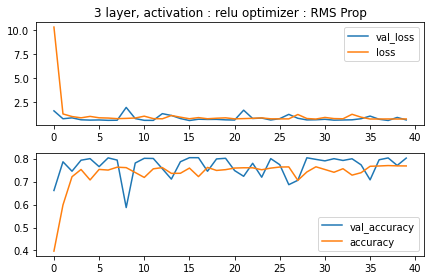

In [ ]:

plt.subplot(2, 1, 1)

title = "3 layer, activation : " + activation_function +" optimizer : " + optimizer
plot_loss_train_validation(history).title(title)
plt.subplot(2, 1, 2) # index 2
plot_accuracy_train_validation(history)
plt.tight_layout()


Text(0.5, 1.0, 'confusionmatrix for test data with 3 layer, activation : relu, optimizer : RMS Prop')

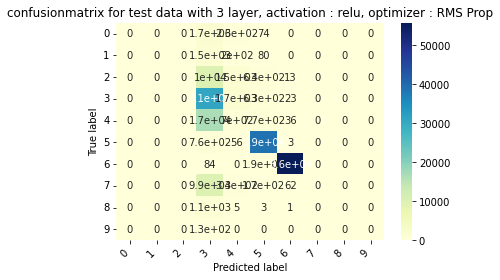

In [ ]:
class_names = np.array([0,1,2,3,4,5,6,7,8,9])
title =  "confusionmatrix for test data with 3 layer, activation : " + activation_function +", optimizer : " + optimizer
plot_confusion_matrix(df_UNSW_y_test ,y_hat,class_names).title(title)

In [ ]:
classnames =[0,1,2,3,4,5,6,7,8,9]
print("**",title,"**")
print("---for test data--- ")
accuracy_of_classes(classnames , df_UNSW_y_test ,y_hat)
truePositiveRate_of_classes( df_UNSW_y_test ,y_hat,classnames)
FalsePositiveRate(  df_UNSW_y_test ,y_hat,classnames)

** confusionmatrix for test data with 3 layer, activation : relu, optimizer : RMS Prop **
---for test data--- 
accuracy of each class : 
accuracy of  0 is :  0.0
accuracy of  1 is :  0.0
accuracy of  2 is :  0.0
accuracy of  3 is :  0.9301350582457402
accuracy of  4 is :  0.03838539375274967
accuracy of  5 is :  0.9795
accuracy of  6 is :  0.9951071428571429
accuracy of  7 is :  0.0
accuracy of  8 is :  0.0
accuracy of  9 is :  0.0

truePositive rate of each class :
true positive rate of 0 is :  0.0
true positive rate of 1 is :  0.0
true positive rate of 2 is :  0.0
true positive rate of 3 is :  0.9301350582457402
true positive rate of 4 is :  0.03838539375274967
true positive rate of 5 is :  0.9795
true positive rate of 6 is :  0.9951071428571429
true positive rate of 7 is :  0.0
true positive rate of 8 is :  0.0
true positive rate of 9 is :  0.0

FalsePositive rate of each class :  
false positive rate of 0 is :  0.0
false positive rate of 1 is :  0.0
false positive rate of 2 is :  0

In [ ]:
print("**",title,"**")
print("---for train data--- ")
predictions_list_train = model.predict(df_UNSW_x[:])
class_predictions=np.argmax(predictions_list_train,axis=1)#y hat
ytrain_hat= class_predictions

accuracy_of_classes(classnames , df_UNSW_y ,ytrain_hat)
truePositiveRate_of_classes( df_UNSW_y ,ytrain_hat,classnames)
FalsePositiveRate(  df_UNSW_y ,ytrain_hat,classnames)

** confusionmatrix for test data with 3 layer, activation : relu, optimizer : RMS Prop **
---for train data--- 
accuracy of each class : 
accuracy of  0 is :  0.0
accuracy of  1 is :  0.0
accuracy of  2 is :  0.0
accuracy of  3 is :  0.9523895077254761
accuracy of  4 is :  0.0676344440778621
accuracy of  5 is :  0.9624291240527794
accuracy of  6 is :  0.9982432432432432
accuracy of  7 is :  0.0
accuracy of  8 is :  0.0
accuracy of  9 is :  0.0

truePositive rate of each class :
true positive rate of 0 is :  0.0
true positive rate of 1 is :  0.0
true positive rate of 2 is :  0.0
true positive rate of 3 is :  0.9523895077254761
true positive rate of 4 is :  0.0676344440778621
true positive rate of 5 is :  0.9624291240527794
true positive rate of 6 is :  0.9982432432432432
true positive rate of 7 is :  0.0
true positive rate of 8 is :  0.0
true positive rate of 9 is :  0.0

FalsePositive rate of each class :  
false positive rate of 0 is :  0.0
false positive rate of 1 is :  0.0
false pos

Text(0.5, 1.0, 'confusion matrix for train data with 3 layer, activation : relu, optimizer : RMS Prop')

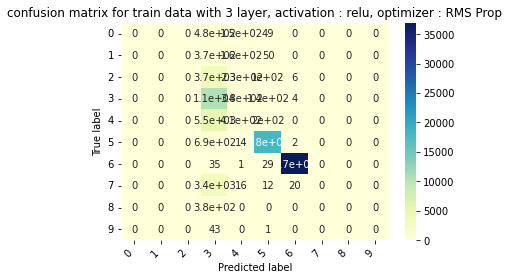

In [ ]:
class_names = np.array([0,1,2,3,4,5,6,7,8,9])
title =  "confusion matrix for train data with 3 layer, activation : " + activation_function +", optimizer : " + optimizer
plot_confusion_matrix(df_UNSW_y ,ytrain_hat,class_names).title(title)

In [ ]:
#_____________________________________________________________________________
# for second 

In [ ]:
activation_function = activation_optimizer_dic[1]['activation']
optimizer = activation_optimizer_dic[1]['optimizer']
print('**make model with 3 layer and activation function ',activation_function , "optimizer : ",optimizer)
bias_item_list = creat_bias_list(df_UNSW_y)
model = make_model(activation_function , optimizer , 44, 10,bias_item_list)
print("**fit modelwith 3 layer and activation function ",activation_function , "optimizer : ",optimizer)
t0 = time.time()
history = fit_model(40, 4096 , X_train , y_train ,X_val , y_val , model  )
t1= time.time()
print("\n**time for training model with 3 layer and activation function ",activation_function , "optimizer : ",optimizer,"is :", t1 - t0)

**make model with 3 layer and activation function  relu optimizer :  adam
**fit modelwith 3 layer and activation function  relu optimizer :  adam
Epoch 1/40
19/19 [==============================] - 1s 33ms/step - loss: 1.7876 - accuracy: 0.6071 - val_loss: 1.4542 - val_accuracy: 0.4831
Epoch 2/40
19/19 [==============================] - 0s 26ms/step - loss: 0.8055 - accuracy: 0.7476 - val_loss: 0.7244 - val_accuracy: 0.7924
Epoch 3/40
19/19 [==============================] - 0s 24ms/step - loss: 0.7403 - accuracy: 0.7675 - val_loss: 0.7467 - val_accuracy: 0.7744
Epoch 4/40
19/19 [==============================] - 0s 25ms/step - loss: 0.6386 - accuracy: 0.7874 - val_loss: 0.6102 - val_accuracy: 0.8105
Epoch 5/40
19/19 [==============================] - 0s 23ms/step - loss: 0.6088 - accuracy: 0.7937 - val_loss: 0.5591 - val_accuracy: 0.8201
Epoch 6/40
19/19 [==============================] - 0s 23ms/step - loss: 0.5923 - accuracy: 0.7975 - val_loss: 0.5438 - val_accuracy: 0.8350
Epoch 7/

In [ ]:
result = evaluate_test(model, df_UNSW_x_test , df_UNSW_y_test , 2048 )
print("**for model with 3 layer and activation function ",activation_function , "optimizer : ",optimizer)
print("test loss, test acc:", result)
t0 = time.time()
y_hat= predict_yhat (model , df_UNSW_x_test )
t1 = time.time()
print("**and time for testing this model is :" , t1 - t0 )

86/86 [==============================] - 1s 7ms/step - loss: 0.8162 - accuracy: 0.7439
**for model with 3 layer and activation function  relu optimizer :  adam
test loss, test acc: [0.81622713804245, 0.7438533902168274]
**and time for testing this model is : 10.545401811599731


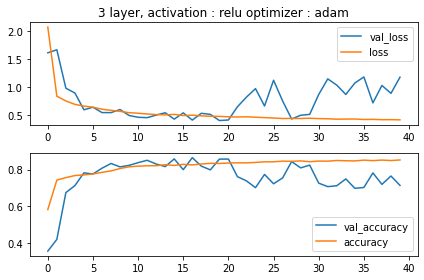

In [ ]:
plt.subplot(2, 1, 1)

title = "3 layer, activation : " + activation_function +" optimizer : " + optimizer
plot_loss_train_validation(history).title(title)
plt.subplot(2, 1, 2) # index 2
plot_accuracy_train_validation(history)
plt.tight_layout()


Text(0.5, 1.0, 'confusionmatrix for test data with 3 layer, activation : relu, optimizer : adam')

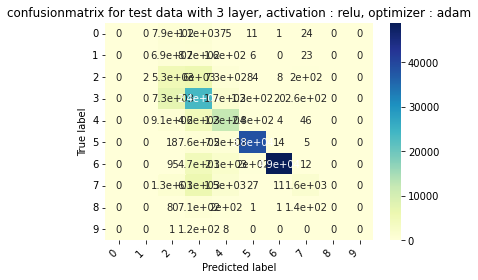

In [ ]:
# class_names = np.array(['normal','DoS', 'R2L' ,'U2R' ,'probe'])
title =  "confusionmatrix for test data with 3 layer, activation : " + activation_function +", optimizer : " + optimizer
plot_confusion_matrix(df_UNSW_y_test ,y_hat,class_names).title(title)

Text(0.5, 1.0, 'confusion matrix for train data with 3 layer, activation : relu, optimizer : adam')

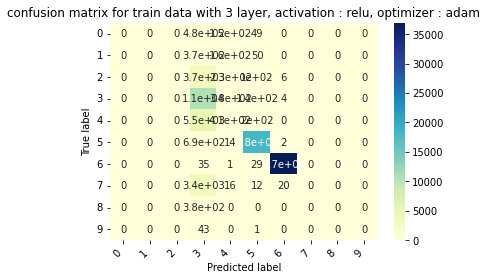

In [ ]:
# class_names = np.array(['normal','DoS', 'R2L' ,'U2R' ,'probe'])
title =  "confusion matrix for train data with 3 layer, activation : " + activation_function +", optimizer : " + optimizer
plot_confusion_matrix(df_UNSW_y ,ytrain_hat,class_names).title(title)

In [ ]:
print("**",title,"**")
print("---for test data--- ")
accuracy_of_classes(classnames , df_UNSW_y_test ,y_hat)
truePositiveRate_of_classes( df_UNSW_y_test ,y_hat,classnames)
FalsePositiveRate(  df_UNSW_y_test ,y_hat,classnames)

** confusion matrix for train data with 3 layer, activation : relu, optimizer : adam **
---for test data--- 
accuracy of each class : 
accuracy of  0 is :  0.0
accuracy of  1 is :  0.0
accuracy of  2 is :  0.4308545335942596
accuracy of  3 is :  0.7183241996825682
accuracy of  4 is :  0.6773537175538935
accuracy of  5 is :  0.96125
accuracy of  6 is :  0.871875
accuracy of  7 is :  0.14917548374797446
accuracy of  8 is :  0.0
accuracy of  9 is :  0.0

truePositive rate of each class :
true positive rate of 0 is :  0.0
true positive rate of 1 is :  0.0
true positive rate of 2 is :  0.4308545335942596
true positive rate of 3 is :  0.7183241996825682
true positive rate of 4 is :  0.6773537175538935
true positive rate of 5 is :  0.96125
true positive rate of 6 is :  0.871875
true positive rate of 7 is :  0.14917548374797446
true positive rate of 8 is :  0.0
true positive rate of 9 is :  0.0

FalsePositive rate of each class :  
false positive rate of 0 is :  0.0
false positive rate of 1 is

In [ ]:
print("**",title,"**")
print("---for train data--- ")
predictions_list_train = model.predict(df_UNSW_x[:])
class_predictions=np.argmax(predictions_list_train,axis=1)#y hat
ytrain_hat= class_predictions

accuracy_of_classes(classnames , df_UNSW_y ,ytrain_hat)
truePositiveRate_of_classes( df_UNSW_y ,ytrain_hat,classnames)
FalsePositiveRate(  df_UNSW_y ,ytrain_hat,classnames)

** confusion matrix for train data with 4 layer, activation : relu, optimizer : adam **
---for train data--- 
accuracy of each class : 
accuracy of  0 is :  0.0
accuracy of  1 is :  0.0
accuracy of  2 is :  0.3974076791391538
accuracy of  3 is :  0.8143190801293568
accuracy of  4 is :  0.7004289013526889
accuracy of  5 is :  0.9594086163955275
accuracy of  6 is :  0.706945945945946
accuracy of  7 is :  0.3112128146453089
accuracy of  8 is :  0.0
accuracy of  9 is :  0.0

truePositive rate of each class :
true positive rate of 0 is :  0.0
true positive rate of 1 is :  0.0
true positive rate of 2 is :  0.3974076791391538
true positive rate of 3 is :  0.8143190801293568
true positive rate of 4 is :  0.7004289013526889
true positive rate of 5 is :  0.9594086163955275
true positive rate of 6 is :  0.706945945945946
true positive rate of 7 is :  0.3112128146453089
true positive rate of 8 is :  0.0
true positive rate of 9 is :  0.0

FalsePositive rate of each class :  
false positive rate of 

In [ ]:
#______________________________bad___________________________________________

In [ ]:
activation_function = activation_optimizer_dic[2]['activation']
optimizer = activation_optimizer_dic[2]['optimizer']
print('**make model with 3 layer and activation function ',activation_function , "optimizer : ",optimizer)
bias_item_list = creat_bias_list(df_UNSW_y)
model = make_model(activation_function , optimizer , 44, 10,bias_item_list)
print("**fit modelwith 3 layer and activation function ",activation_function , "optimizer : ",optimizer)
t0 = time.time()
history = fit_model(40, 8000 , X_train , y_train ,X_val , y_val , model  )
t1= time.time()
print("\n**time for training model with 3 layer and activation function ",activation_function , "optimizer : ",optimizer,"is :", t1 - t0)

**make model with 3 layer and activation function  elu optimizer :  RMS Prop
**fit modelwith 3 layer and activation function  elu optimizer :  RMS Prop
Epoch 1/40
10/10 [==============================] - 2s 64ms/step - loss: 101.6761 - accuracy: 0.3143 - val_loss: 5.0350 - val_accuracy: 0.6542
Epoch 2/40
10/10 [==============================] - 0s 46ms/step - loss: 2.2788 - accuracy: 0.6378 - val_loss: 3.6320 - val_accuracy: 0.4948
Epoch 3/40
10/10 [==============================] - 1s 69ms/step - loss: 1.0883 - accuracy: 0.6696 - val_loss: 1.1661 - val_accuracy: 0.7414
Epoch 4/40
10/10 [==============================] - 1s 77ms/step - loss: 1.0510 - accuracy: 0.6693 - val_loss: 1.1885 - val_accuracy: 0.6759
Epoch 5/40
10/10 [==============================] - 1s 74ms/step - loss: 1.1870 - accuracy: 0.6630 - val_loss: 2.4279 - val_accuracy: 0.6070
Epoch 6/40
10/10 [==============================] - 1s 60ms/step - loss: 1.7375 - accuracy: 0.5771 - val_loss: 1.9493 - val_accuracy: 0.5646


In [ ]:
result = evaluate_test(model, df_UNSW_x_test , df_UNSW_y_test , 2048 )
print("**for model with 3 layer and activation function ",activation_function , "optimizer : ",optimizer)
print("test loss, test acc:", result)
t0 = time.time()
y_hat= predict_yhat (model , df_UNSW_x_test )
t1 = time.time()
print("**and time for testing this model is :" , t1 - t0 )

86/86 [==============================] - 1s 6ms/step - loss: 2.4341 - accuracy: 0.5414
**for model with 3 layer and activation function  elu optimizer :  RMS Prop
test loss, test acc: [2.4340927600860596, 0.5414249897003174]
**and time for testing this model is : 5.721285581588745


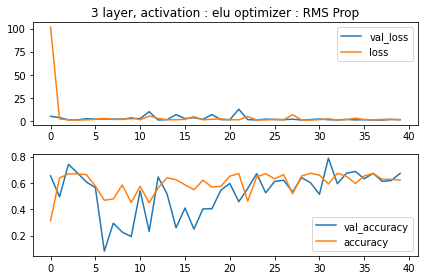

In [ ]:
plt.subplot(2, 1, 1)

title = "3 layer, activation : " + activation_function +" optimizer : " + optimizer
plot_loss_train_validation(history).title(title)
plt.subplot(2, 1, 2) # index 2
plot_accuracy_train_validation(history)
plt.tight_layout()


Text(0.5, 1.0, 'confusionmatrix for test data with 3 layer, activation : elu, optimizer : RMS Prop')

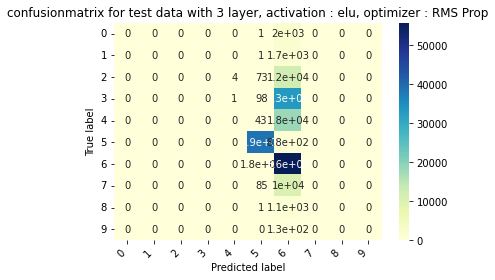

In [ ]:
class_names = np.array([0,1,2,3,4,5,6,7,8,9])
title =  "confusionmatrix for test data with 3 layer, activation : " + activation_function +", optimizer : " + optimizer
plot_confusion_matrix(df_UNSW_y_test ,y_hat,class_names).title(title)

Text(0.5, 1.0, 'confusion matrix for train data with 3 layer, activation : elu, optimizer : RMS Prop')

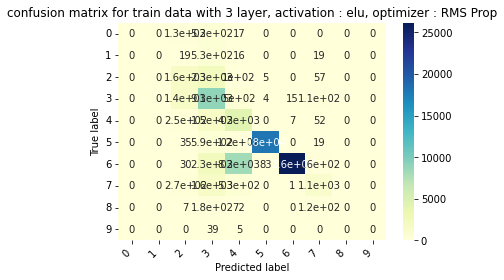

In [ ]:
# class_names = np.array(['normal','DoS', 'R2L' ,'U2R' ,'probe'])
title =  "confusion matrix for train data with 3 layer, activation : " + activation_function +", optimizer : " + optimizer
plot_confusion_matrix(df_UNSW_y ,ytrain_hat,class_names).title(title)

In [ ]:
print("**",title,"**")
print("---for test data--- ")
accuracy_of_classes(classnames , df_UNSW_y_test ,y_hat)
truePositiveRate_of_classes( df_UNSW_y_test ,y_hat,classnames)
FalsePositiveRate(  df_UNSW_y_test ,y_hat,classnames)

** confusion matrix for train data with 3 layer, activation : elu, optimizer : RMS Prop **
---for test data--- 
accuracy of each class : 
accuracy of  0 is :  0.0
accuracy of  1 is :  0.0
accuracy of  2 is :  0.0
accuracy of  3 is :  0.0
accuracy of  4 is :  0.0
accuracy of  5 is :  0.97795
accuracy of  6 is :  0.9967142857142857
accuracy of  7 is :  0.0
accuracy of  8 is :  0.0
accuracy of  9 is :  0.0

truePositive rate of each class :
true positive rate of 0 is :  0.0
true positive rate of 1 is :  0.0
true positive rate of 2 is :  0.0
true positive rate of 3 is :  0.0
true positive rate of 4 is :  0.0
true positive rate of 5 is :  0.97795
true positive rate of 6 is :  0.9967142857142857
true positive rate of 7 is :  0.0
true positive rate of 8 is :  0.0
true positive rate of 9 is :  0.0

FalsePositive rate of each class :  
false positive rate of 0 is :  0.0
false positive rate of 1 is :  0.0
false positive rate of 2 is :  0.0
false positive rate of 3 is :  0.0
false positive rate o

In [ ]:
print("**",title,"**")
print("---for train data--- ")
predictions_list_train = model.predict(df_UNSW_x[:])
class_predictions=np.argmax(predictions_list_train,axis=1)#y hat
ytrain_hat= class_predictions

accuracy_of_classes(classnames , df_UNSW_y ,ytrain_hat)
truePositiveRate_of_classes( df_UNSW_y ,ytrain_hat,classnames)
FalsePositiveRate(  df_UNSW_y ,ytrain_hat,classnames)

** confusion matrix for train data with 3 layer, activation : elu, optimizer : RMS Prop **
---for train data--- 
accuracy of each class : 
accuracy of  0 is :  0.0
accuracy of  1 is :  0.0
accuracy of  2 is :  0.0
accuracy of  3 is :  0.0
accuracy of  4 is :  0.0
accuracy of  5 is :  0.9624291240527794
accuracy of  6 is :  0.9997567567567568
accuracy of  7 is :  0.0
accuracy of  8 is :  0.0
accuracy of  9 is :  0.0

truePositive rate of each class :
true positive rate of 0 is :  0.0
true positive rate of 1 is :  0.0
true positive rate of 2 is :  0.0
true positive rate of 3 is :  0.0
true positive rate of 4 is :  0.0
true positive rate of 5 is :  0.9624291240527794
true positive rate of 6 is :  0.9997567567567568
true positive rate of 7 is :  0.0
true positive rate of 8 is :  0.0
true positive rate of 9 is :  0.0

FalsePositive rate of each class :  
false positive rate of 0 is :  0.0
false positive rate of 1 is :  0.0
false positive rate of 2 is :  0.0
false positive rate of 3 is :  0.

In [ ]:
#_________________________________________________________________________

In [ ]:
activation_function = activation_optimizer_dic[3]['activation']
optimizer = activation_optimizer_dic[3]['optimizer']
print('**make model with 3 layer and activation function ',activation_function , "optimizer : ",optimizer)
bias_item_list = creat_bias_list(df_UNSW_y)
model = make_model(activation_function , optimizer , 44, 10,bias_item_list)
print("**fit modelwith 3 layer and activation function ",activation_function , "optimizer : ",optimizer)
t0 = time.time()
history = fit_model(40, 4096 , X_train , y_train ,X_val , y_val , model  )
t1= time.time()
print("\n**time for training model with 3 layer and activation function ",activation_function , "optimizer : ",optimizer,"is :", t1 - t0)

**make model with 3 layer and activation function  elu optimizer :  adam
**fit modelwith 3 layer and activation function  elu optimizer :  adam
Epoch 1/40
19/19 [==============================] - 1s 37ms/step - loss: 5.7075 - accuracy: 0.5053 - val_loss: 3.7099 - val_accuracy: 0.2677
Epoch 2/40
19/19 [==============================] - 1s 27ms/step - loss: 1.0327 - accuracy: 0.6885 - val_loss: 2.0493 - val_accuracy: 0.3925
Epoch 3/40
19/19 [==============================] - 1s 27ms/step - loss: 0.7741 - accuracy: 0.7577 - val_loss: 1.6656 - val_accuracy: 0.6069
Epoch 4/40
19/19 [==============================] - 1s 27ms/step - loss: 0.6823 - accuracy: 0.7794 - val_loss: 1.3064 - val_accuracy: 0.5973
Epoch 5/40
19/19 [==============================] - 1s 27ms/step - loss: 0.6413 - accuracy: 0.7861 - val_loss: 0.8919 - val_accuracy: 0.6975
Epoch 6/40
19/19 [==============================] - 1s 28ms/step - loss: 0.6194 - accuracy: 0.7891 - val_loss: 1.5634 - val_accuracy: 0.5023
Epoch 7/40

In [ ]:
result = evaluate_test(model, df_UNSW_x_test , df_UNSW_y_test , 2048 )
print("**for model with 3 layer and activation function ",activation_function , "optimizer : ",optimizer)
print("test loss, test acc:", result)
t0 = time.time()
y_hat= predict_yhat (model , df_UNSW_x_test )
t1 = time.time()
print("**and time for testing this model is :" , t1 - t0 )

86/86 [==============================] - 1s 9ms/step - loss: 0.6220 - accuracy: 0.7766
**for model with 3 layer and activation function  elu optimizer :  adam
test loss, test acc: [0.621955931186676, 0.7766010165214539]
**and time for testing this model is : 10.466783285140991


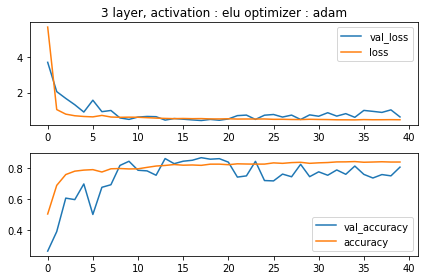

In [ ]:
plt.subplot(2, 1, 1)

title = "3 layer, activation : " + activation_function +" optimizer : " + optimizer
plot_loss_train_validation(history).title(title)
plt.subplot(2, 1, 2) # index 2
plot_accuracy_train_validation(history)
plt.tight_layout()


Text(0.5, 1.0, 'confusionmatrix for test data with 3 layer, activation : elu, optimizer : adam')

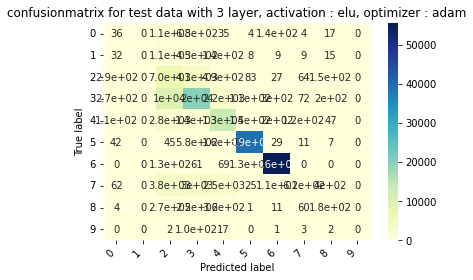

In [ ]:
# class_names = np.array(['normal','DoS', 'R2L' ,'U2R' ,'probe'])
title =  "confusionmatrix for test data with 3 layer, activation : " + activation_function +", optimizer : " + optimizer
plot_confusion_matrix(df_UNSW_y_test ,y_hat,class_names).title(title)

In [ ]:
print("**",title,"**")
print("---for test data--- ")
accuracy_of_classes(classnames , df_UNSW_y_test ,y_hat)
truePositiveRate_of_classes( df_UNSW_y_test ,y_hat,classnames)
FalsePositiveRate(  df_UNSW_y_test ,y_hat,classnames)

** confusionmatrix for test data with 3 layer, activation : elu, optimizer : adam **
---for test data--- 
accuracy of each class : 
accuracy of  0 is :  0.018
accuracy of  1 is :  0.0
accuracy of  2 is :  0.574853228962818
accuracy of  3 is :  0.6038690743569012
accuracy of  4 is :  0.736691597008359
accuracy of  5 is :  0.978
accuracy of  6 is :  0.9930714285714286
accuracy of  7 is :  0.058431036126203414
accuracy of  8 is :  0.15710503089143865
accuracy of  9 is :  0.0

truePositive rate of each class :
true positive rate of 0 is :  0.018
true positive rate of 1 is :  0.0
true positive rate of 2 is :  0.574853228962818
true positive rate of 3 is :  0.6038690743569012
true positive rate of 4 is :  0.736691597008359
true positive rate of 5 is :  0.978
true positive rate of 6 is :  0.9930714285714286
true positive rate of 7 is :  0.058431036126203414
true positive rate of 8 is :  0.15710503089143865
true positive rate of 9 is :  0.0

FalsePositive rate of each class :  
false positive 

In [ ]:
print("**",title,"**")
print("---for train data--- ")
predictions_list_train = model.predict(df_UNSW_x[:])
class_predictions=np.argmax(predictions_list_train,axis=1)#y hat
ytrain_hat= class_predictions

accuracy_of_classes(classnames , df_UNSW_y ,ytrain_hat)
truePositiveRate_of_classes( df_UNSW_y ,ytrain_hat,classnames)
FalsePositiveRate(  df_UNSW_y ,ytrain_hat,classnames)

** confusionmatrix for test data with 3 layer, activation : elu, optimizer : adam **
---for train data--- 
accuracy of each class : 
accuracy of  0 is :  0.08419497784342689
accuracy of  1 is :  0.0
accuracy of  2 is :  0.5651748593788213
accuracy of  3 is :  0.7460474308300395
accuracy of  4 is :  0.6963048498845266
accuracy of  5 is :  0.9622171586031477
accuracy of  6 is :  0.8789189189189189
accuracy of  7 is :  0.03318077803203661
accuracy of  8 is :  0.1402116402116402
accuracy of  9 is :  0.0

truePositive rate of each class :
true positive rate of 0 is :  0.08419497784342689
true positive rate of 1 is :  0.0
true positive rate of 2 is :  0.5651748593788213
true positive rate of 3 is :  0.7460474308300395
true positive rate of 4 is :  0.6963048498845266
true positive rate of 5 is :  0.9622171586031477
true positive rate of 6 is :  0.8789189189189189
true positive rate of 7 is :  0.03318077803203661
true positive rate of 8 is :  0.1402116402116402
true positive rate of 9 is :  0.

Text(0.5, 1.0, 'confusion matrix for train data with 3 layer, activation : elu, optimizer : adam')

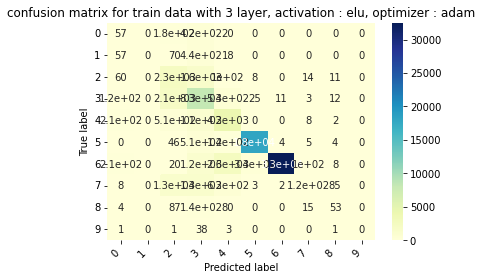

In [ ]:
class_names = np.array([0,1,2,3,4,5,6,7,8,9])
title =  "confusion matrix for train data with 3 layer, activation : " + activation_function +", optimizer : " + optimizer
plot_confusion_matrix(df_UNSW_y ,ytrain_hat,class_names).title(title)

In [ ]:
#_________________________________________________________________________

In [ ]:
activation_function = activation_optimizer_dic[1]['activation']
optimizer = activation_optimizer_dic[1]['optimizer']
print('**make model with 4 layer and activation function ',activation_function , "optimizer : ",optimizer)
bias_item_list = creat_bias_list(df_UNSW_y)
model = make_model_4(activation_function , optimizer , 44, 10,bias_item_list)
print("**fit modelwith 4 layer and activation function ",activation_function , "optimizer : ",optimizer)
t0 = time.time()
history = fit_model(40, 10000 , X_train , y_train ,X_val , y_val , model  )
t1= time.time()
print("\n**time for training model with 4 layer and activation function ",activation_function , "optimizer : ",optimizer,"is :", t1 - t0)

**make model with 4 layer and activation function  relu optimizer :  adam
**fit modelwith 4 layer and activation function  relu optimizer :  adam
Epoch 1/40
8/8 [==============================] - 4s 364ms/step - loss: 2.8333 - accuracy: 0.4869 - val_loss: 10.5854 - val_accuracy: 0.2386
Epoch 2/40
8/8 [==============================] - 2s 240ms/step - loss: 0.8410 - accuracy: 0.6823 - val_loss: 33.5825 - val_accuracy: 0.2391
Epoch 3/40
8/8 [==============================] - 2s 281ms/step - loss: 0.7174 - accuracy: 0.7303 - val_loss: 33.9565 - val_accuracy: 0.2458
Epoch 4/40
8/8 [==============================] - 2s 304ms/step - loss: 0.6200 - accuracy: 0.7816 - val_loss: 28.0418 - val_accuracy: 0.2431
Epoch 5/40
8/8 [==============================] - 2s 255ms/step - loss: 0.5555 - accuracy: 0.7995 - val_loss: 20.1433 - val_accuracy: 0.2771
Epoch 6/40
8/8 [==============================] - 3s 385ms/step - loss: 0.5333 - accuracy: 0.8036 - val_loss: 13.3393 - val_accuracy: 0.3880
Epoch 7/

In [ ]:
result = evaluate_test(model, df_UNSW_x_test , df_UNSW_y_test , 2048 )
print("**for model with 4 layer and activation function ",activation_function , "optimizer : ",optimizer)
print("test loss, test acc:", result)
t0 = time.time()
y_hat= predict_yhat (model , df_UNSW_x_test )
t1 = time.time()
print("**and time for testing this model is :" , t1 - t0 )

86/86 [==============================] - 1s 10ms/step - loss: 0.6780 - accuracy: 0.7835
**for model with 4 layer and activation function  relu optimizer :  adam
test loss, test acc: [0.6780231595039368, 0.7835360765457153]
**and time for testing this model is : 6.842840909957886


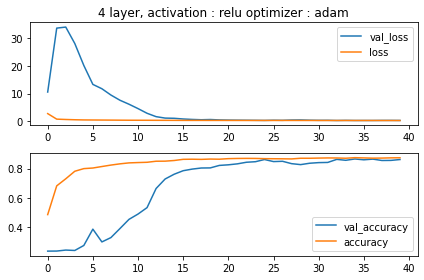

In [ ]:
plt.subplot(2, 1, 1)

title = "4 layer, activation : " + activation_function +" optimizer : " + optimizer
plot_loss_train_validation(history).title(title)
plt.subplot(2, 1, 2) # index 2
plot_accuracy_train_validation(history)
plt.tight_layout()


Text(0.5, 1.0, 'confusionmatrix for test data with 4 layer, activation : relu, optimizer : adam')

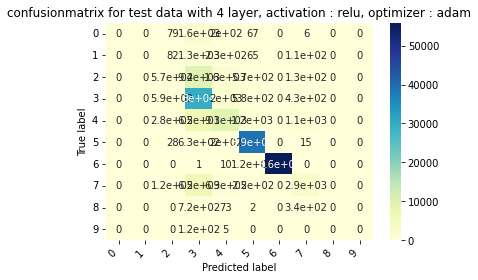

In [ ]:
class_names = np.array([0,1,2,3,4,5,6,7,8,9])
title =  "confusionmatrix for test data with 4 layer, activation : " + activation_function +", optimizer : " + optimizer
plot_confusion_matrix(df_UNSW_y_test ,y_hat,class_names).title(title)

In [ ]:
print("**",title,"**")
print("---for test data--- ")
classnames = np.array([0,1,2,3,4,5,6,7,8,9])
accuracy_of_classes(classnames , df_UNSW_y_test ,y_hat)
truePositiveRate_of_classes( df_UNSW_y_test ,y_hat,classnames)
FalsePositiveRate(  df_UNSW_y_test ,y_hat,classnames)

** confusionmatrix for test data with 4 layer, activation : relu, optimizer : adam **
---for test data--- 
accuracy of each class : 
accuracy of  0 is :  0.0
accuracy of  1 is :  0.0
accuracy of  2 is :  0.04647749510763209
accuracy of  3 is :  0.8923127601593148
accuracy of  4 is :  0.5024197096348438
accuracy of  5 is :  0.978175
accuracy of  6 is :  0.9976071428571428
accuracy of  7 is :  0.2754742159946621
accuracy of  8 is :  0.0
accuracy of  9 is :  0.0

truePositive rate of each class :
true positive rate of 0 is :  0.0
true positive rate of 1 is :  0.0
true positive rate of 2 is :  0.04647749510763209
true positive rate of 3 is :  0.8923127601593148
true positive rate of 4 is :  0.5024197096348438
true positive rate of 5 is :  0.978175
true positive rate of 6 is :  0.9976071428571428
true positive rate of 7 is :  0.2754742159946621
true positive rate of 8 is :  0.0
true positive rate of 9 is :  0.0

FalsePositive rate of each class :  
false positive rate of 0 is :  0.0
false p

In [ ]:
print("**",title,"**")
print("---for train data--- ")
predictions_list_train = model.predict(df_UNSW_x[:])
class_predictions=np.argmax(predictions_list_train,axis=1)#y hat
ytrain_hat= class_predictions

accuracy_of_classes(classnames , df_UNSW_y ,ytrain_hat)
truePositiveRate_of_classes( df_UNSW_y ,ytrain_hat,classnames)
FalsePositiveRate(  df_UNSW_y ,ytrain_hat,classnames)

** confusionmatrix for test data with 4 layer, activation : relu, optimizer : adam **
---for train data--- 
accuracy of each class : 
accuracy of  0 is :  0.0
accuracy of  1 is :  0.0
accuracy of  2 is :  0.002690144289557349
accuracy of  3 is :  0.8818720804886813
accuracy of  4 is :  0.7438139227977565
accuracy of  5 is :  0.9629060463144508
accuracy of  6 is :  1.0
accuracy of  7 is :  0.3595537757437071
accuracy of  8 is :  0.0
accuracy of  9 is :  0.0

truePositive rate of each class :
true positive rate of 0 is :  0.0
true positive rate of 1 is :  0.0
true positive rate of 2 is :  0.002690144289557349
true positive rate of 3 is :  0.8818720804886813
true positive rate of 4 is :  0.7438139227977565
true positive rate of 5 is :  0.9629060463144508
true positive rate of 6 is :  1.0
true positive rate of 7 is :  0.3595537757437071
true positive rate of 8 is :  0.0
true positive rate of 9 is :  0.0

FalsePositive rate of each class :  
false positive rate of 0 is :  0.0
false positive

Text(0.5, 1.0, 'confusion matrix for train data with 4 layer, activation : relu, optimizer : adam')

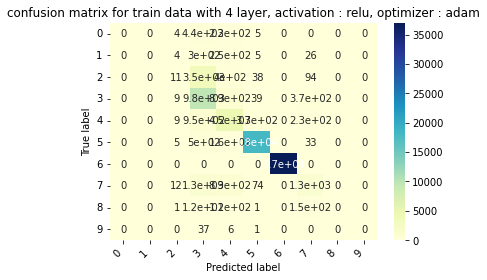

In [ ]:
class_names = np.array([0,1,2,3,4,5,6,7,8,9])
title =  "confusion matrix for train data with 4 layer, activation : " + activation_function +", optimizer : " + optimizer
plot_confusion_matrix(df_UNSW_y ,ytrain_hat,class_names).title(title)

In [ ]:
#_______________model 4 __________________________________
activation_optimizer_dic = [ 
                  {'activation' :'relu', 'optimizer' : 'RMS Prop'  },{'activation' :'relu', 'optimizer' : 'adam' },
                  {'activation' :'elu', 'optimizer' : 'RMS Prop' },{'activation' :'elu', 'optimizer' : 'adam' }
]

In [ ]:
activation_function = activation_optimizer_dic[0]['activation']
optimizer = activation_optimizer_dic[0]['optimizer']
print('**make model with 4 layer and activation function ',activation_function , "optimizer : ",optimizer)
bias_item_list = creat_bias_list(df_UNSW_y)
model = make_model_4(activation_function , optimizer , 44, 10,bias_item_list)
print("**fit modelwith 4 layer and activation function ",activation_function , "optimizer : ",optimizer)
t0 = time.time()
history = fit_model(40, 8000 , X_train , y_train ,X_val , y_val , model  )
t1= time.time()
print("\n**time for training model with 4 layer and activation function ",activation_function , "optimizer : ",optimizer,"is :", t1 - t0)

**make model with 4 layer and activation function  relu optimizer :  RMS Prop
**fit modelwith 4 layer and activation function  relu optimizer :  RMS Prop
Epoch 1/40
10/10 [==============================] - 3s 148ms/step - loss: 3.2664 - accuracy: 0.3336 - val_loss: 1.6553 - val_accuracy: 0.5026
Epoch 2/40
10/10 [==============================] - 1s 119ms/step - loss: 0.9088 - accuracy: 0.6657 - val_loss: 1.9065 - val_accuracy: 0.6021
Epoch 3/40
10/10 [==============================] - 1s 148ms/step - loss: 0.7412 - accuracy: 0.7226 - val_loss: 1.2347 - val_accuracy: 0.6794
Epoch 4/40
10/10 [==============================] - 2s 198ms/step - loss: 0.7391 - accuracy: 0.7189 - val_loss: 3.2995 - val_accuracy: 0.6230
Epoch 5/40
10/10 [==============================] - 2s 196ms/step - loss: 0.9777 - accuracy: 0.7219 - val_loss: 0.6642 - val_accuracy: 0.7940
Epoch 6/40
10/10 [==============================] - 2s 186ms/step - loss: 0.6715 - accuracy: 0.7491 - val_loss: 0.9933 - val_accuracy: 0

In [ ]:
result = evaluate_test(model, df_UNSW_x_test , df_UNSW_y_test , 2048 )
print("**for model with 4 layer and activation function ",activation_function , "optimizer : ",optimizer)
print("test loss, test acc:", result)
t0 = time.time()
y_hat= predict_yhat (model , df_UNSW_x_test )
t1 = time.time()
print("**and time for testing this model is :" , t1 - t0 )

86/86 [==============================] - 1s 9ms/step - loss: 2.7899 - accuracy: 0.6853
**for model with 4 layer and activation function  relu optimizer :  RMS Prop
test loss, test acc: [2.7899320125579834, 0.6853160262107849]
**and time for testing this model is : 10.430177211761475


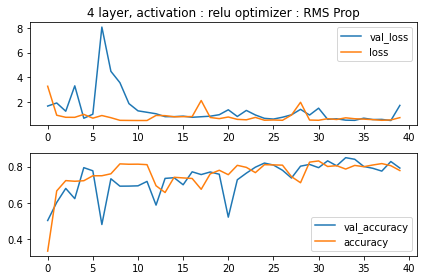

In [ ]:
plt.subplot(2, 1, 1)

title = "4 layer, activation : " + activation_function +" optimizer : " + optimizer
plot_loss_train_validation(history).title(title)
plt.subplot(2, 1, 2) # index 2
plot_accuracy_train_validation(history)
plt.tight_layout()


Text(0.5, 1.0, 'confusionmatrix for test data with 4 layer, activation : relu, optimizer : RMS Prop')

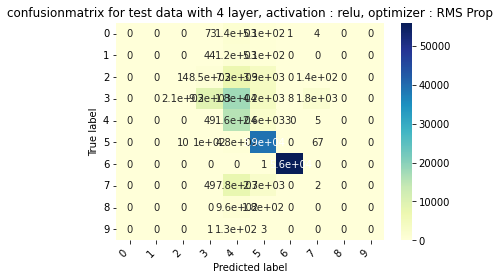

In [ ]:
# class_names = np.array(['normal','DoS', 'R2L' ,'U2R' ,'probe'])
title =  "confusionmatrix for test data with 4 layer, activation : " + activation_function +", optimizer : " + optimizer
plot_confusion_matrix(df_UNSW_y_test ,y_hat,class_names).title(title)

In [ ]:
print("**",title,"**")
print("---for test data--- ")
# classnames = np.array(['normal','DoS', 'R2L' ,'U2R' ,'probe'])
accuracy_of_classes(classnames , df_UNSW_y_test ,y_hat)
truePositiveRate_of_classes( df_UNSW_y_test ,y_hat,classnames)
FalsePositiveRate(  df_UNSW_y_test ,y_hat,classnames)

** confusionmatrix for test data with 4 layer, activation : relu, optimizer : RMS Prop **
---for test data--- 
accuracy of each class : 
accuracy of  0 is :  0.0
accuracy of  1 is :  0.0
accuracy of  2 is :  0.001141552511415525
accuracy of  3 is :  0.27739346569640344
accuracy of  4 is :  0.854707435107787
accuracy of  5 is :  0.9836
accuracy of  6 is :  0.9999821428571428
accuracy of  7 is :  0.0001906395958440568
accuracy of  8 is :  0.0
accuracy of  9 is :  0.0

truePositive rate of each class :
true positive rate of 0 is :  0.0
true positive rate of 1 is :  0.0
true positive rate of 2 is :  0.001141552511415525
true positive rate of 3 is :  0.27739346569640344
true positive rate of 4 is :  0.854707435107787
true positive rate of 5 is :  0.9836
true positive rate of 6 is :  0.9999821428571428
true positive rate of 7 is :  0.0001906395958440568
true positive rate of 8 is :  0.0
true positive rate of 9 is :  0.0

FalsePositive rate of each class :  
false positive rate of 0 is :  0.0

In [ ]:
print("**",title,"**")
print("---for train data--- ")
predictions_list_train = model.predict(df_UNSW_x[:])
class_predictions=np.argmax(predictions_list_train,axis=1)#y hat
ytrain_hat= class_predictions

accuracy_of_classes(classnames , df_UNSW_y ,ytrain_hat)
truePositiveRate_of_classes( df_UNSW_y ,ytrain_hat,classnames)
FalsePositiveRate(  df_UNSW_y ,ytrain_hat,classnames)

** confusionmatrix for test data with 4 layer, activation : relu, optimizer : RMS Prop **
---for train data--- 
accuracy of each class : 
accuracy of  0 is :  0.0
accuracy of  1 is :  0.0
accuracy of  2 is :  0.0034238200048911714
accuracy of  3 is :  0.4084620912684154
accuracy of  4 is :  0.8403167271527548
accuracy of  5 is :  0.9662974935085581
accuracy of  6 is :  1.0
accuracy of  7 is :  0.0
accuracy of  8 is :  0.0
accuracy of  9 is :  0.0

truePositive rate of each class :
true positive rate of 0 is :  0.0
true positive rate of 1 is :  0.0
true positive rate of 2 is :  0.0034238200048911714
true positive rate of 3 is :  0.4084620912684154
true positive rate of 4 is :  0.8403167271527548
true positive rate of 5 is :  0.9662974935085581
true positive rate of 6 is :  1.0
true positive rate of 7 is :  0.0
true positive rate of 8 is :  0.0
true positive rate of 9 is :  0.0

FalsePositive rate of each class :  
false positive rate of 0 is :  0.0
false positive rate of 1 is :  0.0
fal

Text(0.5, 1.0, 'confusion matrix for train data with 4 layer, activation : relu, optimizer : RMS Prop')

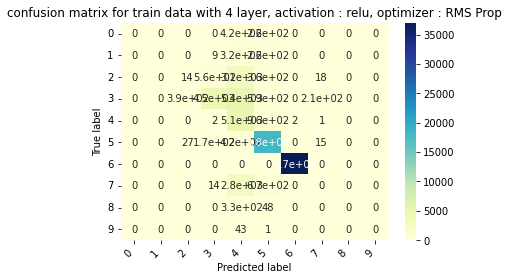

In [ ]:
# class_names = np.array(['normal','DoS', 'R2L' ,'U2R' ,'probe'])
title =  "confusion matrix for train data with 4 layer, activation : " + activation_function +", optimizer : " + optimizer
plot_confusion_matrix(df_UNSW_y ,ytrain_hat,class_names).title(title)

In [ ]:
#_____________next___________________


In [ ]:
activation_function = activation_optimizer_dic[2]['activation']
optimizer = activation_optimizer_dic[2]['optimizer']
print('**make model with 4 layer and activation function ',activation_function , "optimizer : ",optimizer)
bias_item_list = creat_bias_list(df_UNSW_y)
model = make_model_4(activation_function , optimizer , 44, 10,bias_item_list)
print("**fit modelwith 4 layer and activation function ",activation_function , "optimizer : ",optimizer)
t0 = time.time()
history = fit_model(40, 8000 , X_train , y_train ,X_val , y_val , model  )
t1= time.time()
print("\n**time for training model with 4 layer and activation function ",activation_function , "optimizer : ",optimizer,"is :", t1 - t0)

**make model with 4 layer and activation function  elu optimizer :  RMS Prop
**fit modelwith 4 layer and activation function  elu optimizer :  RMS Prop
Epoch 1/40
10/10 [==============================] - 3s 150ms/step - loss: 8.3375 - accuracy: 0.3458 - val_loss: 2.9036 - val_accuracy: 0.6666
Epoch 2/40
10/10 [==============================] - 1s 127ms/step - loss: 1.1444 - accuracy: 0.7100 - val_loss: 1.9113 - val_accuracy: 0.6790
Epoch 3/40
10/10 [==============================] - 1s 132ms/step - loss: 0.8949 - accuracy: 0.7307 - val_loss: 1.7210 - val_accuracy: 0.7598
Epoch 4/40
10/10 [==============================] - 1s 125ms/step - loss: 0.9076 - accuracy: 0.7459 - val_loss: 2.8607 - val_accuracy: 0.4573
Epoch 5/40
10/10 [==============================] - 1s 125ms/step - loss: 2.8629 - accuracy: 0.5752 - val_loss: 3.9424 - val_accuracy: 0.6794
Epoch 6/40
10/10 [==============================] - 1s 127ms/step - loss: 1.0174 - accuracy: 0.7312 - val_loss: 1.3708 - val_accuracy: 0.7

In [ ]:
result = evaluate_test(model, df_UNSW_x_test , df_UNSW_y_test , 2048 )
print("**for model with 4 layer and activation function ",activation_function , "optimizer : ",optimizer)
print("test loss, test acc:", result)
t0 = time.time()
y_hat= predict_yhat (model , df_UNSW_x_test )
t1 = time.time()
print("**and time for testing this model is :" , t1 - t0 )

86/86 [==============================] - 1s 14ms/step - loss: 2.4606 - accuracy: 0.7118
**for model with 4 layer and activation function  elu optimizer :  RMS Prop
test loss, test acc: [2.4606029987335205, 0.7118186950683594]
**and time for testing this model is : 10.446943998336792


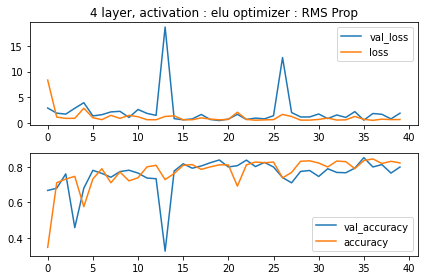

In [ ]:
plt.subplot(2, 1, 1)

title = "4 layer, activation : " + activation_function +" optimizer : " + optimizer
plot_loss_train_validation(history).title(title)
plt.subplot(2, 1, 2) # index 2
plot_accuracy_train_validation(history)
plt.tight_layout()


Text(0.5, 1.0, 'confusionmatrix for test data with 4 layer, activation : relu, optimizer : RMS Prob')

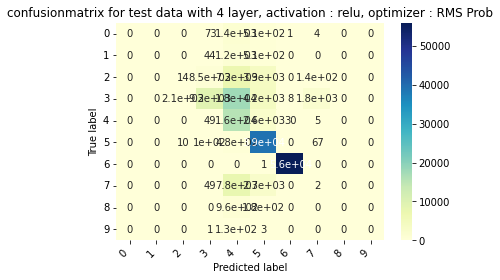

In [65]:
class_names = np.array([0,1,2,3,4,5,6,7,8,9])
title =  "confusionmatrix for test data with 4 layer, activation : " + "elu" +", optimizer : " + "RMS Prob"
plot_confusion_matrix(df_UNSW_y_test ,y_hat,class_names).title(title)

In [ ]:
print("**",title,"**")
print("---for test data--- ")
accuracy_of_classes(classnames , df_UNSW_y_test ,y_hat)
truePositiveRate_of_classes( df_UNSW_y_test ,y_hat,classnames)
FalsePositiveRate(  df_UNSW_y_test ,y_hat,classnames)

** confusionmatrix for test data with 4 layer, activation : elu, optimizer : RMS Prop **
---for test data--- 
accuracy of each class : 
accuracy of  0 is :  0.009
accuracy of  1 is :  0.0
accuracy of  2 is :  0.3886986301369863
accuracy of  3 is :  0.2805977300631869
accuracy of  4 is :  0.855862296524417
accuracy of  5 is :  0.980525
accuracy of  6 is :  0.9977142857142857
accuracy of  7 is :  0.0
accuracy of  8 is :  0.0
accuracy of  9 is :  0.0

truePositive rate of each class :
true positive rate of 0 is :  0.009
true positive rate of 1 is :  0.0
true positive rate of 2 is :  0.3886986301369863
true positive rate of 3 is :  0.2805977300631869
true positive rate of 4 is :  0.855862296524417
true positive rate of 5 is :  0.980525
true positive rate of 6 is :  0.9977142857142857
true positive rate of 7 is :  0.0
true positive rate of 8 is :  0.0
true positive rate of 9 is :  0.0

FalsePositive rate of each class :  
false positive rate of 0 is :  0.00035767648738613484
false positive 

In [ ]:
print("**",title,"**")
print("---for train data--- ")
predictions_list_train = model.predict(df_UNSW_x[:])
class_predictions=np.argmax(predictions_list_train,axis=1)#y hat
ytrain_hat= class_predictions

accuracy_of_classes(classnames , df_UNSW_y ,ytrain_hat)
truePositiveRate_of_classes( df_UNSW_y ,ytrain_hat,classnames)
FalsePositiveRate(  df_UNSW_y ,ytrain_hat,classnames)

** confusionmatrix for test data with 4 layer, activation : elu, optimizer : RMS Prop **
---for train data--- 
accuracy of each class : 
accuracy of  0 is :  0.0
accuracy of  1 is :  0.0
accuracy of  2 is :  0.4402054292002935
accuracy of  3 is :  0.24658641753503413
accuracy of  4 is :  0.9208182118112834
accuracy of  5 is :  0.9683111652800593
accuracy of  6 is :  1.0
accuracy of  7 is :  0.0
accuracy of  8 is :  0.0
accuracy of  9 is :  0.0

truePositive rate of each class :
true positive rate of 0 is :  0.0
true positive rate of 1 is :  0.0
true positive rate of 2 is :  0.4402054292002935
true positive rate of 3 is :  0.24658641753503413
true positive rate of 4 is :  0.9208182118112834
true positive rate of 5 is :  0.9683111652800593
true positive rate of 6 is :  1.0
true positive rate of 7 is :  0.0
true positive rate of 8 is :  0.0
true positive rate of 9 is :  0.0

FalsePositive rate of each class :  
false positive rate of 0 is :  0.0004898658992100913
false positive rate of 1 

Text(0.5, 1.0, 'confusion matrix for train data with 4 layer, activation : elu, optimizer : RMS Prop')

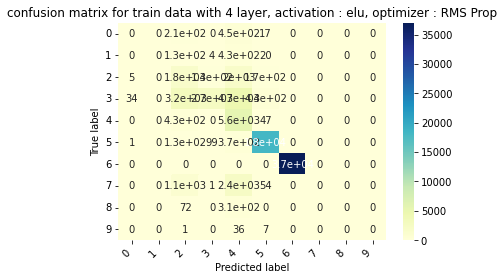

In [ ]:
class_names = np.array([0,1,2,3,4,5,6,7,8,9])
title =  "confusion matrix for train data with 4 layer, activation : " + activation_function +", optimizer : " + optimizer
plot_confusion_matrix(df_UNSW_y ,ytrain_hat,class_names).title(title)

In [ ]:
#_________last 

In [ ]:
activation_function = activation_optimizer_dic[3]['activation']
optimizer = activation_optimizer_dic[3]['optimizer']
print('**make model with 4 layer and activation function ',activation_function , "optimizer : ",optimizer)
bias_item_list = creat_bias_list(df_UNSW_y)
model = make_model_4(activation_function , optimizer , 44, 10,bias_item_list)
print("**fit modelwith 4 layer and activation function ",activation_function , "optimizer : ",optimizer)
t0 = time.time()
history = fit_model(40, 8000 , X_train , y_train ,X_val , y_val , model  )
t1= time.time()
print("\n**time for training model with 4 layer and activation function ",activation_function , "optimizer : ",optimizer,"is :", t1 - t0)

**make model with 4 layer and activation function  elu optimizer :  adam
**fit modelwith 4 layer and activation function  elu optimizer :  adam
Epoch 1/40
10/10 [==============================] - 2s 153ms/step - loss: 2.1385 - accuracy: 0.5565 - val_loss: 43.6007 - val_accuracy: 0.3007
Epoch 2/40
10/10 [==============================] - 1s 131ms/step - loss: 0.6843 - accuracy: 0.7739 - val_loss: 26.2553 - val_accuracy: 0.3971
Epoch 3/40
10/10 [==============================] - 1s 129ms/step - loss: 0.5541 - accuracy: 0.8102 - val_loss: 19.5781 - val_accuracy: 0.4886
Epoch 4/40
10/10 [==============================] - 3s 287ms/step - loss: 0.4927 - accuracy: 0.8240 - val_loss: 9.3574 - val_accuracy: 0.6088
Epoch 5/40
10/10 [==============================] - 3s 260ms/step - loss: 0.4597 - accuracy: 0.8341 - val_loss: 4.7432 - val_accuracy: 0.6780
Epoch 6/40
10/10 [==============================] - 2s 210ms/step - loss: 0.4399 - accuracy: 0.8379 - val_loss: 2.6031 - val_accuracy: 0.7259
E

In [ ]:
result = evaluate_test(model, df_UNSW_x_test , df_UNSW_y_test , 2048 )
print("**for model with 4 layer and activation function ",activation_function , "optimizer : ",optimizer)
print("test loss, test acc:", result)
t0 = time.time()
y_hat= predict_yhat (model , df_UNSW_x_test )
t1 = time.time()
print("**and time for testing this model is :" , t1 - t0 )

86/86 [==============================] - 2s 21ms/step - loss: 0.6642 - accuracy: 0.7548
**for model with 4 layer and activation function  elu optimizer :  adam
test loss, test acc: [0.6642144918441772, 0.7547863721847534]
**and time for testing this model is : 7.812626838684082


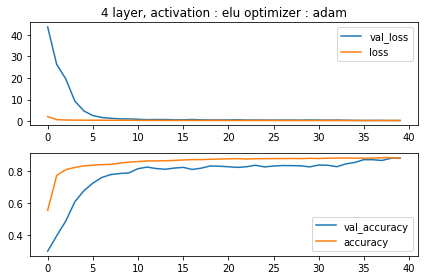

In [ ]:
plt.subplot(2, 1, 1)

title = "4 layer, activation : " + activation_function +" optimizer : " + optimizer
plot_loss_train_validation(history).title(title)
plt.subplot(2, 1, 2) # index 2
plot_accuracy_train_validation(history)
plt.tight_layout()


Text(0.5, 1.0, 'confusionmatrix for test data with 4 layer, activation : elu, optimizer : adam')

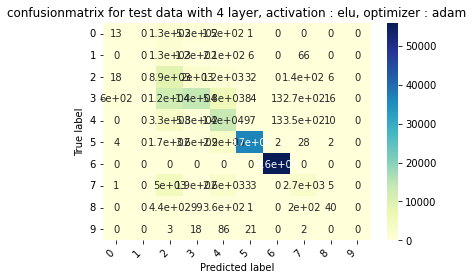

In [ ]:
# class_names = np.array(['normal','DoS', 'R2L' ,'U2R' ,'probe'])
title =  "confusionmatrix for test data with 4 layer, activation : " + activation_function +", optimizer : " + optimizer
plot_confusion_matrix(df_UNSW_y_test ,y_hat,class_names).title(title)

In [ ]:
print("**",title,"**")
print("---for test data--- ")
accuracy_of_classes(classnames , df_UNSW_y_test ,y_hat)
truePositiveRate_of_classes( df_UNSW_y_test ,y_hat,classnames)
FalsePositiveRate(  df_UNSW_y_test ,y_hat,classnames)

** confusionmatrix for test data with 4 layer, activation : elu, optimizer : adam **
---for test data--- 
accuracy of each class : 
accuracy of  0 is :  0.0065
accuracy of  1 is :  0.0
accuracy of  2 is :  0.7266797129810828
accuracy of  3 is :  0.4283233012906897
accuracy of  4 is :  0.7598988121425428
accuracy of  5 is :  0.913675
accuracy of  6 is :  1.0
accuracy of  7 is :  0.25850729196454103
accuracy of  8 is :  0.0353045013239188
accuracy of  9 is :  0.0

truePositive rate of each class :
true positive rate of 0 is :  0.0065
true positive rate of 1 is :  0.0
true positive rate of 2 is :  0.7266797129810828
true positive rate of 3 is :  0.4283233012906897
true positive rate of 4 is :  0.7598988121425428
true positive rate of 5 is :  0.913675
true positive rate of 6 is :  1.0
true positive rate of 7 is :  0.25850729196454103
true positive rate of 8 is :  0.0353045013239188
true positive rate of 9 is :  0.0

FalsePositive rate of each class :  
false positive rate of 0 is :  0.0036

In [ ]:
print("**",title,"**")
print("---for train data--- ")
predictions_list_train = model.predict(df_UNSW_x[:])
class_predictions=np.argmax(predictions_list_train,axis=1)#y hat
ytrain_hat= class_predictions

accuracy_of_classes(classnames , df_UNSW_y ,ytrain_hat)
truePositiveRate_of_classes( df_UNSW_y ,ytrain_hat,classnames)
FalsePositiveRate(  df_UNSW_y ,ytrain_hat,classnames)

** confusionmatrix for test data with 4 layer, activation : elu, optimizer : adam **
---for train data--- 
accuracy of each class : 
accuracy of  0 is :  0.0620384047267356
accuracy of  1 is :  0.0
accuracy of  2 is :  0.5932990951332844
accuracy of  3 is :  0.6325907294286741
accuracy of  4 is :  0.8073243154074563
accuracy of  5 is :  0.9676222775687563
accuracy of  6 is :  1.0
accuracy of  7 is :  0.7331235697940504
accuracy of  8 is :  0.2222222222222222
accuracy of  9 is :  0.0

truePositive rate of each class :
true positive rate of 0 is :  0.0620384047267356
true positive rate of 1 is :  0.0
true positive rate of 2 is :  0.5932990951332844
true positive rate of 3 is :  0.6325907294286741
true positive rate of 4 is :  0.8073243154074563
true positive rate of 5 is :  0.9676222775687563
true positive rate of 6 is :  1.0
true positive rate of 7 is :  0.7331235697940504
true positive rate of 8 is :  0.2222222222222222
true positive rate of 9 is :  0.0

FalsePositive rate of each clas

Text(0.5, 1.0, 'confusion matrix for train data with 4 layer, activation : elu, optimizer : adam')

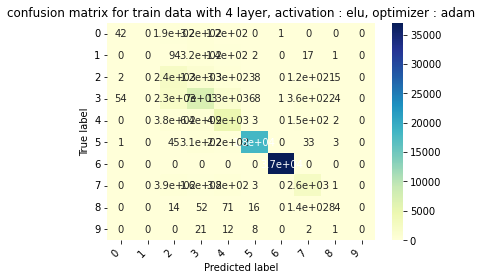

In [ ]:
# class_names = np.array(['normal','DoS', 'R2L' ,'U2R' ,'probe'])
title =  "confusion matrix for train data with 4 layer, activation : " + activation_function +", optimizer : " + optimizer
plot_confusion_matrix(df_UNSW_y ,ytrain_hat,class_names).title(title)